In [2]:
import pandas as pd
from os.path import isfile, join
from os import listdir
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as scp

In [3]:
datafiles = [join('.\\data', f) for f in listdir('./data') if join('./data', f).endswith(".csv")]

In [6]:
datafiles

['.\\data\\Guess_1167_part0_2025-07-02_18h08.55.968.csv',
 '.\\data\\Guess_1167_part1_part2_2025-07-02_18h32.03.916.csv',
 '.\\data\\Guess_1167_sm_2025-07-02_19h13.56.366.csv',
 '.\\data\\Guess_2172_part0_2025-06-23_15h31.44.862.csv',
 '.\\data\\Guess_2172_part1_part2_2025-06-23_15h46.32.531.csv',
 '.\\data\\Guess_2172_sm_2025-06-23_16h27.15.471.csv',
 '.\\data\\Guess_2405_part0_2025-06-18_18h53.06.633.csv',
 '.\\data\\Guess_2405_part1_part2_2025-06-18_19h05.06.793.csv',
 '.\\data\\Guess_2405_sm_2025-06-18_19h52.42.236.csv',
 '.\\data\\Guess_3084_part0_2025-05-30_12h54.23.016.csv',
 '.\\data\\Guess_3084_part0_2025-05-30_13h02.37.105.csv',
 '.\\data\\Guess_3084_part1_part2_2025-05-30_13h16.54.106.csv',
 '.\\data\\Guess_3084_sm_2025-05-30_14h00.35.729.csv',
 '.\\data\\Guess_4110_part0_2025-06-06_12h56.37.524.csv',
 '.\\data\\Guess_4110_part1_part2_2025-06-06_13h16.02.627.csv',
 '.\\data\\Guess_4110_sm_2025-06-06_14h00.43.501.csv',
 '.\\data\\Guess_5613_part0_2025-06-04_17h50.35.863.csv',

In [8]:
counter = 0
frames = []
IDs = []
for f in datafiles:
    
    if "recall_selection.keys" in pd.read_csv(f):
        df = pd.read_csv(f, converters={'PID': str})
        IDs.append(df["PID"][0])
        frames.append(df)
        counter += 1
print('Number of finished experiments', counter)

Number of finished experiments 13


In [5]:
# trial_type : Guess or Read
# guess_reached.keys : how many guesses (fgh) 0-1-More
# recall_reached.keys : do they recall or not (fg) No - Yes
# recall_selection.key : which letter they chose (just added saving which is which)
# recall_selection.rt : check how long it takes for them generally to select
# living_nonliving.keys : (fg) living/nonliving
# living_nonliving.rt

In [10]:
all_trials = pd.concat(frames,  ignore_index = True).filter(["PID", "Alter", "Geschlecht", "date", "cue", "target", "list_item", 
                                      "trial_type", "guess_reached.keys", "guess_reached.rt",
                                       "test_trials.thisIndex",
                                      "recall_reached.keys", "recall_reached.rt",
                                       "recall_selection.keys", "recall_selection.rt", "correct_choice"])
all_trials["recalled"] = (all_trials["recall_reached.keys"] == 3)
all_trials["corr_recalled"] = (all_trials["correct_choice"] == 1)
all_trials.loc[all_trials["PID"]=="pilot1", "recalled"] = (all_trials["recall_reached.keys"] == 2)

In [12]:
recall = all_trials.loc[all_trials["test_trials.thisIndex"] >= 0]
recall

,PID,date,cue,target,trial_type,guess_reached.keys,guess_reached.rt,test_trials.thisIndex,recall_reached.keys,recall_reached.rt,recall_selection.keys,recall_selection.rt,correct_choice,recalled,corr_recalled
144,1167,2025-07-02_18h32.03.916,NaN,NaN,Guess,NaN,NaN,0.0,2.0,1.054457,NaN,NaN,0.0,False,False
145,1167,2025-07-02_18h32.03.916,NaN,NaN,Guess,NaN,NaN,0.0,3.0,0.419925,3.0,1.001158,1.0,True,True
146,1167,2025-07-02_18h32.03.916,NaN,NaN,Guess,NaN,NaN,0.0,3.0,0.593489,3.0,1.403121,1.0,True,True
147,1167,2025-07-02_18h32.03.916,NaN,NaN,Read,NaN,NaN,0.0,3.0,1.184194,4.0,1.394139,1.0,True,True
148,1167,2025-07-02_18h32.03.916,NaN,NaN,Guess,NaN,NaN,0.0,3.0,0.719202,2.0,2.641464,1.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3463,9210,2025-07-05_12h42.12.912,NaN,NaN,Read,NaN,NaN,0.0,3.0,0.733581,5.0,2.458424,1.0,True,True
3464,9210,2025-07-05_12h42.12.912,NaN,NaN,Guess,NaN,NaN,0.0,3.0,0.646445,5.0,1.288052,1.0,True,True
3465,9210,2025-07-05_12h42.12.912,NaN,NaN,Guess,NaN,NaN,0.0,3.0,0.524073,2.0,0.904159,1.0,True,True
3466,9210,2025-07-05_12h42.12.912,NaN,NaN,Read,NaN,NaN,0.0,3.0,1.144494,3.0,2.023574,0.0,True,False


<Axes: xlabel='guess_reached.keys', ylabel='guess_reached.rt'>

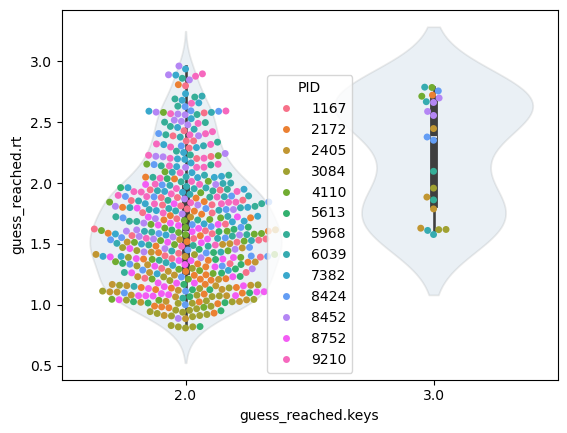

In [14]:
sns.violinplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", alpha=0.1)
sns.swarmplot(data = all_trials, x="guess_reached.keys", y = "guess_reached.rt", hue="PID")

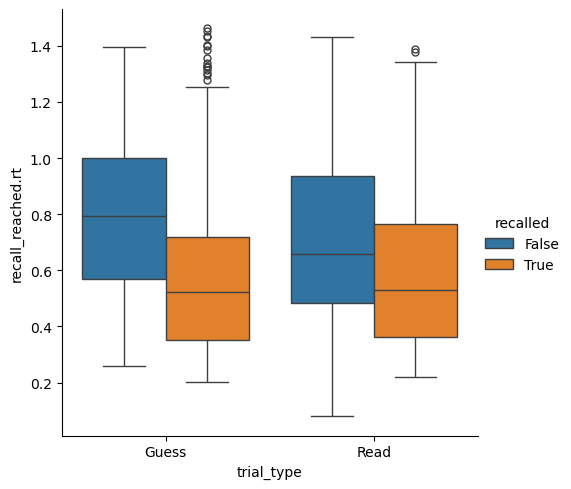

In [16]:
sns.catplot(data = recall, hue = "recalled", kind="box", x="trial_type", y = "recall_reached.rt")

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='trial_type', ylabel='recall_reached.rt'>

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


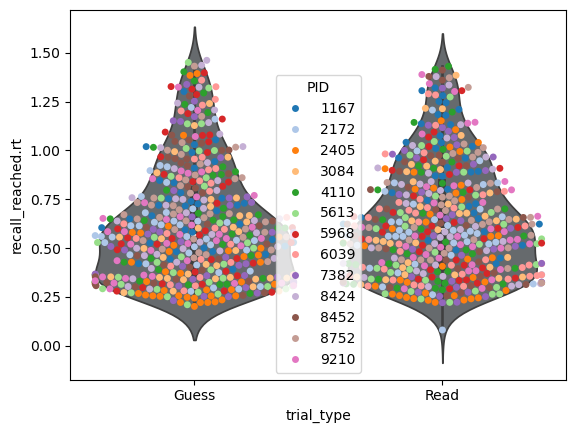

In [18]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="PID", palette='tab20')

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='trial_type', ylabel='recall_reached.rt'>

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


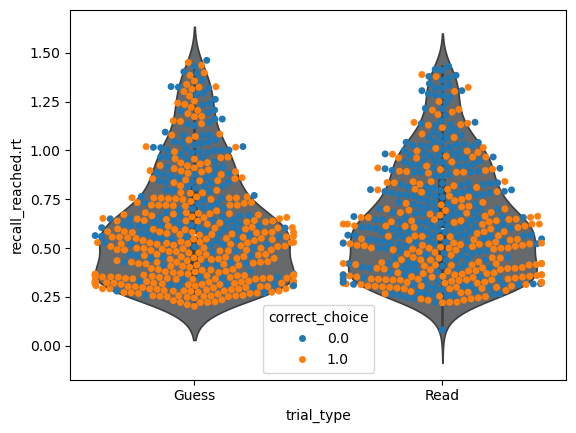

In [20]:
sns.violinplot(data = recall, x="trial_type", y = "recall_reached.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_reached.rt", hue="correct_choice")

<Axes: xlabel='trial_type', ylabel='recall_selection.rt'>

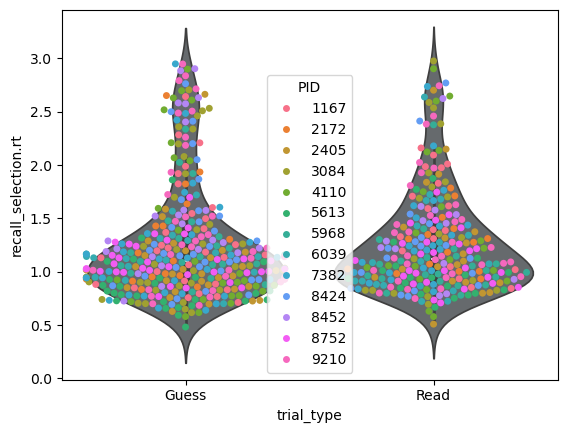

In [22]:
sns.violinplot(data = recall, x="trial_type", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="trial_type", y = "recall_selection.rt", hue="PID")

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='corr_recalled', ylabel='recall_selection.rt'>

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


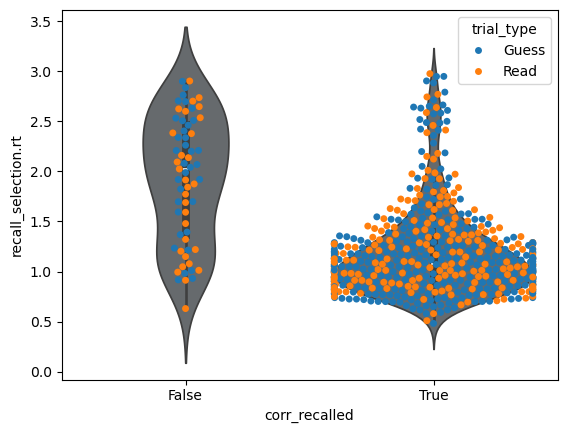

In [24]:
sns.violinplot(data = recall, x="corr_recalled", y = "recall_selection.rt", saturation=0.05)
sns.swarmplot(data = recall, x="corr_recalled", y = "recall_selection.rt", hue="trial_type")

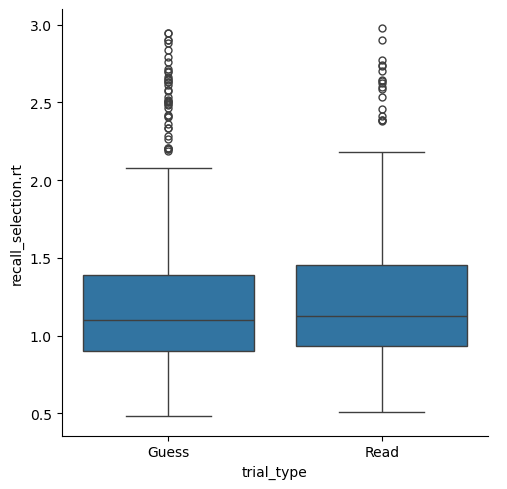

In [26]:
sns.catplot(data = recall,  x="trial_type", y = "recall_selection.rt", kind='box')

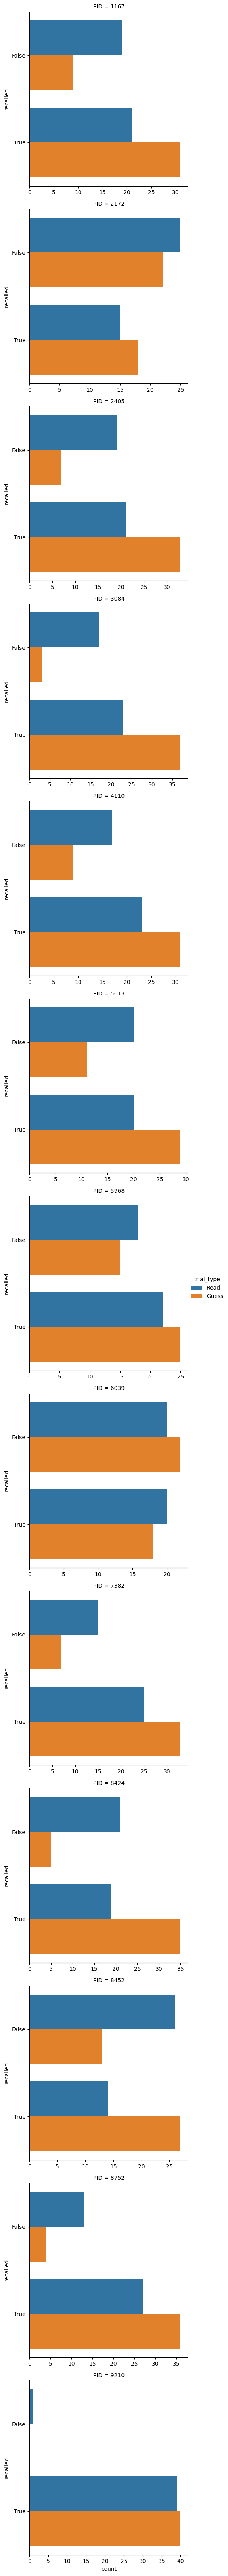

In [28]:
sns.catplot(data = recall, y = "recalled", kind="count", hue="trial_type", row='PID', sharex=False, hue_order=["Read", "Guess"])

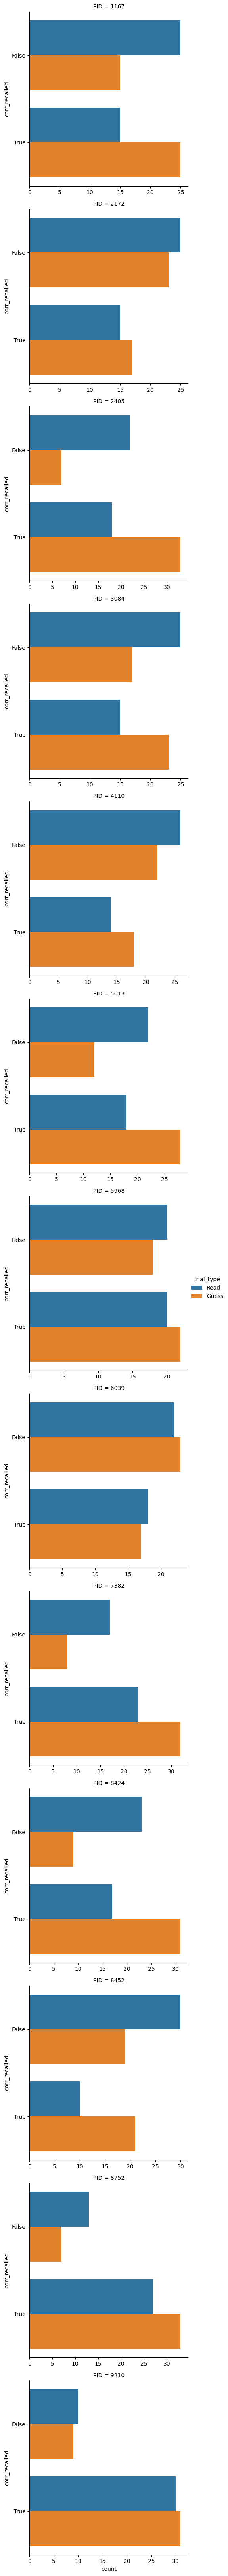

In [30]:
sns.catplot(data = recall, y = "corr_recalled", kind="count", hue="trial_type", row='PID', sharex=False, hue_order=["Read", "Guess"])

In [32]:
recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['recalled']], normalize='index')
recall_sum

trial_type   Guess            Read        
recalled     False   True    False   True 
PID                                       
1167        0.1125  0.3875  0.2375  0.2625
2172        0.2750  0.2250  0.3125  0.1875
2405        0.0875  0.4125  0.2375  0.2625
3084        0.0375  0.4625  0.2125  0.2875
4110        0.1125  0.3875  0.2125  0.2875
5613        0.1375  0.3625  0.2500  0.2500
5968        0.1875  0.3125  0.2250  0.2750
6039        0.2750  0.2250  0.2500  0.2500
7382        0.0875  0.4125  0.1875  0.3125
8424        0.0625  0.4375  0.2625  0.2375
8452        0.1625  0.3375  0.3250  0.1750
8752        0.0500  0.4500  0.1625  0.3375
9210        0.0000  0.5000  0.0125  0.4875

In [34]:
scp.ttest_rel(recall_sum['Guess'][True], recall_sum['Read'][True])

TtestResult(statistic=5.371730757351839, pvalue=0.00016758791113665283, df=12)

In [68]:
corr_recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['trial_type'], recall['corr_recalled']], normalize='index').reset_index()
corr_recall_sum

trial_type      PID   Guess            Read        
corr_recalled         False    True   False    True
0              1167  0.1875  0.3125  0.3125  0.1875
1              2172  0.2875  0.2125  0.3125  0.1875
2              2405  0.0875  0.4125  0.2750  0.2250
3              3084  0.2125  0.2875  0.3125  0.1875
4              4110  0.2750  0.2250  0.3250  0.1750
5              5613  0.1500  0.3500  0.2750  0.2250
6              5968  0.2250  0.2750  0.2500  0.2500
7              6039  0.2875  0.2125  0.2750  0.2250
8              7382  0.1000  0.4000  0.2125  0.2875
9              8424  0.1125  0.3875  0.2875  0.2125
10             8452  0.2375  0.2625  0.3750  0.1250
11             8752  0.0875  0.4125  0.1625  0.3375
12             9210  0.1125  0.3875  0.1250  0.3750

In [172]:
corr_recall_sum = pd.crosstab(index=recall['PID'], columns = [recall['corr_recalled'], recall['trial_type']])#.reset_index()
#corr_recall_sum['Guess'] = corr_recall_sum['Guess'] / 40
#corr_recall_sum['Read'] = corr_recall_sum['Read'] / 40
corr_recall_sum

corr_recalled False      True      
trial_type    Guess Read Guess Read
PID                                
1167             15   25    25   15
2172             23   25    17   15
2405              7   22    33   18
3084             17   25    23   15
4110             22   26    18   14
5613             12   22    28   18
5968             18   20    22   20
6039             23   22    17   18
7382              8   17    32   23
8424              9   23    31   17
8452             19   30    21   10
8752              7   13    33   27
9210              9   10    31   30

In [174]:
corr_recall_sum.stack()#.melt(id_vars="index")

C:\Users\LocalAdmin\AppData\Local\Temp\ipykernel_13532\2341244655.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  corr_recall_sum.stack()#.melt(id_vars="index")


corr_recalled    False  True 
PID  trial_type              
1167 Guess          15     25
     Read           25     15
2172 Guess          23     17
     Read           25     15
2405 Guess           7     33
     Read           22     18
3084 Guess          17     23
     Read           25     15
4110 Guess          22     18
     Read           26     14
5613 Guess          12     28
     Read           22     18
5968 Guess          18     22
     Read           20     20
6039 Guess          23     17
     Read           22     18
7382 Guess           8     32
     Read           17     23
8424 Guess           9     31
     Read           23     17
8452 Guess          19     21
     Read           30     10
8752 Guess           7     33
     Read           13     27
9210 Guess           9     31
     Read           10     30

In [114]:
scp.ttest_rel(corr_recall_sum['Guess'][True], corr_recall_sum['Read'][True])

TtestResult(statistic=4.949747468305833, pvalue=0.0003365232814526244, df=12)

In [116]:
corr_recall_sum.columns

MultiIndex([('Guess', False),
            ('Guess',  True),
            ( 'Read', False),
            ( 'Read',  True)],
           names=['trial_type', 'corr_recalled'])

In [118]:
corr_recall_sum[('Guess', True)].describe()

count    13.000000
mean      0.636538
std       0.154992
min       0.425000
25%       0.525000
50%       0.625000
75%       0.775000
max       0.825000
Name: (Guess, True), dtype: float64

In [120]:
corr_recall_sum[('Read', True)].describe()

count    13.000000
mean      0.461538
std       0.136784
min       0.250000
25%       0.375000
50%       0.450000
75%       0.500000
max       0.750000
Name: (Read, True), dtype: float64

In [122]:
print(scp.pearsonr(corr_recall_sum[('Read', True)], corr_recall_sum[('Guess', True)]))

PearsonRResult(statistic=0.624571569777109, pvalue=0.022488217597710584)
